<a href="https://colab.research.google.com/github/vn322/Cod_future/blob/main/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tutorialspoint.com/scikit_learn/scikit_learn_tutorial.pdf
https://scikit-learn.org/stable/modules/preprocessing.html
https://datastart.ru/blog/read/chto-takoe-scikit-learn-gayd-po-populyarnoy-biblioteke-python-dlya-nachinayuschih 

https://developers.google.com/machine-learning/crash-course/logistic-regression/calculating-a-probability?hl=ru

Scikit-learn - одна из наиболее популярных библиотек Python для Data Science и Machine Learning. Она позволяет выполнять большое количество операций и предоставляет множество алгоритмов. Scikit-learn также предлагает отличную документацию, в том числе и на русском языке описывающую классы, методы и функции библиотеки, а также описание  алгоритмов с необходимыми сведениями из математики. 

Scikit-Learn имеет в своём составе методы для:

- предварительной обработки данных;
- уменьшения размерности;
- подбора гиперпараметров  модели;
- регрессии;
- классификации;
- кластерного анализа
- и многое другое

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Для реализации алгоритмов машинного обучения желательно иметь достаточно большой набор данных, иначе теряется сам смысл применения сложных инструментов. Для работы мы используем набор данных [League of Legends Diamond Ranked Games (10 min)](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min), который содержит  статистику 9879 рейтинговых игр (SOLO QUEUE) с высоким рейтингом ELO  (DIAMOND I - MASTER)за первые 10 минут игры. 

In [109]:
lol = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
lol.head(3)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [81]:
lol.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

# Разделение данных

Разделение набора данных в Scikit-learn решено функцией `sklearn.model_selection.train_test_split`. Сначала нужно определить целевую (зависимую) переменную, у нас это будет индикатор `blueWins` принимающий значение "1" в случае победы команды синих, и "0" - в случае поражения.

После определения целевой переменной необходимо разделить данные. Ведь нельзя оценить прогностическую эффективность модели на тех же данных, которые  использовались для её обучения. 

In [110]:
X=lol[['blueKills','blueDeaths','blueWardsPlaced', 'blueWardsDestroyed',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAssists','blueTotalMinionsKilled']]
y=lol['blueWins']

Чтобы объективно проверить точность  модели на данных, которые модель "не видела",  набор данных делят на две неравные части — тренировочный и тестовый набор . Тренировочный набор применяется для обучения модели, поэтому его делают большим, чтобы модель имела достаточно возможностей для обучения, а тестовый меньшим, достаточным для проверки. 

В следущем примере данные будут разделены в соотношении 70/30, т. е. 70% данных будут использоваться как
 данные для тренировки (обучения) модели, а 30% будут использоваться в качестве тестовых данных.

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6915, 8)
(2964, 8)
(6915,)
(2964,)


Проверим корректность  разделения данных по количеству и составу.

In [112]:
X.iloc[[2]]

,blueKills,blueDeaths,blueWardsPlaced,blueWardsDestroyed,blueTowersDestroyed,blueTotalGold,blueAssists,blueTotalMinionsKilled
2,7,11,15,0,0,16113,4,186


In [113]:
y.iloc[[2]]

2    0
Name: blueWins, dtype: int64

# Алгоритмы машинного обучения Scikit-Learn

Более подробно применение каждого алгоритма мы разберём в следующем модуле, а сейчас сосредоточимся на рассмотрении возможностей именно библиотеки Scikit-Learn.

У Scikit-learn единый способ использования всех методов.
Для моделей (estimator object) доступны следующие методы.

- `model.fit()` – настройка на данные (обучение)

- `model.fit(X, y)` – для обучения с учителем (supervised learning)

- `model.fit(X)` – для обучение без учителя (unsupervised learning)

Для обучения с учителем:

`model.predict(X_test)` – предсказать значения целевой переменной

`model.predict_proba()` – выдать «степень уверенности» в ответе
(вероятность) – для некоторых моделей

`model.decision_function()` – решающая функция – для некоторых
моделей

`model.score()` – в большинстве моделей встроены методы оценки их
качества работы

`model.transform()` – для отбора признаков (feature selection)
«сжимает» обучающую матрицу. Для регрессионных моделей и
классификаторов (linear, RF и т.п.) выделяет наиболее
информативные признаки

# Логистическая регрессия

Начнём с классификации при помощи логистической регрессии. Обучим модель и предложим ей сделать прогноз на строке с индексом 2. В нашем наборе данных для данной строки целевая переменная равна 0, что значит поражение и прогноз так же равен 0. Однако, если мы подставим строку с индексом 1, то увидим, что модель даст ошибочный прогноз, поэтому необходимо понять с какой точностью делается прогноз и насколько он может быть надёжным.

In [127]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
classifier.predict(X.iloc[[2]])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0])

Для оценки будем использовать штатный метод `score(X, y[, sample_weight])` который возвращает Accuracy - отношение точных прогнозов к общему их количеству или точнее

$$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$$

где 

TP - истинные положительные результаты (True Positive) прогноз совпал с реальностью

TN - истинные отрицательные результаты, (True Negative) , прогноз совпал с реальностью

FP - ложные положительные результаты (False Positive) ошибка 1-го рода, модель прогнозировала положительный результат, а на самом деле он отрицательный

FN - ложные отрицательные результаты (False Negative) ошибка 2-го рода, модель прогнозировала отрицательный результат, но на самом деле он положительный

И в данных условиях для данной модели получим точность 0.7, что безусловно неплохой результат, но место для ошибки остаётся и желательно точнее определить сколько и каких ошибок ожидается при пользовании моделью.

In [87]:
classifier.score(X_test, y_test)

0.7058029689608637

С целью оценки прогноза используется матрица ошибок (confusion matrix) – таблица с 4 различными комбинациями прогнозируемых и фактических значений. Прогнозируемые значения описываются как положительные и отрицательные, а фактические – как истинные и ложные. Вообще матрица ошибок используется для оценки точности моделей в задачах классификации. Но многие другие задачи можно рассматривать как частный случай этой проблемы, поэтому confusion matrix актуальна и для измерения точности прогноза. Важно, что матрица ошибок позволяет оценить эффективность прогноза не только в качественном, но и в количественном выражении

In [129]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1035  445]
 [ 427 1057]]


Не всегда числа хорошо воспринимаются нашим сознанием  и поэтому, при возможности, желательно визуализировать результаты исследования.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


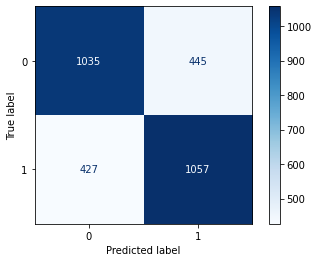

In [89]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

ROC — Receiver Operating Characteristic (рабочая характеристика приёмника). Впервые она была создана для использования радиолокационного обнаружения сигналов во время Второй мировой войны. США использовали ROC для повышения точности обнаружения японских самолетов с помощью радара. 

Матрица ошибок содержит только абсолютные числа. Однако, используя их, мы можем получить множество других метрик, основанных на процентных соотношениях. 

Так вводят: True Positive Rate (TPR) и False Positive Rate (FPR)

True Positive Rate (TPR) показывает, какой процент среди всех positive верно предсказан моделью.
$$TPR = TP / (TP + FN)$$

False Positive Rate (FPR): какой процент среди всех negative неверно предсказан моделью.
$$FPR = FP / (FP + TN)$$

AUC или area under curve — это просто площадь под кривой ROC. А кривая ROC — это просто отношение TPR к FPR.

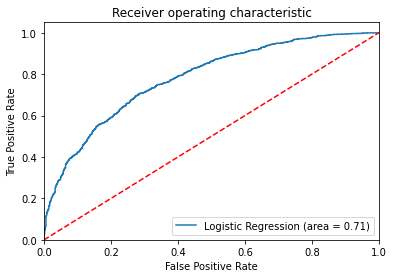

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

При использовании моделей классификации в машинном обучении есть несколько общих показателя, которые применяются для оценки качества модели:

1. **precision** - процент правильных положительных прогнозов по отношению к общему количеству положительных прогнозов.

2. **recall** - процент правильных положительных прогнозов по отношению к общему количеству фактических положительных результатов.


$${\displaystyle {\begin{aligned}{\text{Precision}}&={\frac {TP}{TP+FN}}\\{\text{Recall}}&={\frac {TP}{TP+FN}}\,\end{aligned}}}$$
3. **f1-score** - средневзвешенное гармоническое значение точности и полноты. Чем ближе к 1, тем лучше модель.

$$
{\displaystyle F_1=2\cdot {\frac {\mathrm {Precision} \cdot \mathrm {Recall} }{\mathrm {Precision} +\mathrm {Recall} }}}
$$
Используя эти три показателя, мы можем понять, насколько хорошо данная модель классификации способна предсказывать результаты для некоторой переменной отклика .

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1480
           1       0.70      0.71      0.71      1484

    accuracy                           0.71      2964
   macro avg       0.71      0.71      0.71      2964
weighted avg       0.71      0.71      0.71      2964



# Ансамблевые методы

Цель ансамблевых методов — объединить прогнозы нескольких базовых оценок, построенных с заданным алгоритмом обучения, чтобы улучшить надежность по сравнению с одной оценкой.

Обычно выделяют два семейства ансамблевых методов:

В методах усреднения главный принцип состоит в том, чтобы  усреднить прогнозы . В среднем, комбинированная оценка обычно лучше, чем любая из оценок с одной моделью, потому что ее дисперсия имеет тенденцию к уменьшению. 

Напротив, в методах с использованием бустинга оценки строятся последовательно, и каждый пытается уменьшить смещение комбинированной оценки. 


## Решающее дерево

In [92]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)
print (tree)
print (tree.score(X_test, y_test))
print (tree.predict(X.iloc[[1]]))

DecisionTreeClassifier(max_depth=10)
0.6737516869095816
[0]


## Случайный  лес

In [93]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
rf.score(X_train, y_train)


0.887699234844666

In [94]:
print (rf.score(X_test, y_test))
print (rf.predict(X.iloc[[2]]))


0.20871799209586972
[0.12]


In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [96]:
print (rf.score(X_test, y_test))
print (rf.predict(X.iloc[[1]]))

0.7068151147098516
[0]


In [97]:
from sklearn.metrics import classification_report
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1480
           1       0.71      0.69      0.70      1484

    accuracy                           0.71      2964
   macro avg       0.71      0.71      0.71      2964
weighted avg       0.71      0.71      0.71      2964



## Gradient boosting

Gradient boosting — это метод машинного обучения, используемый, в частности, в задачах регрессии и классификации. Он создает модель прогнозирования в виде ансамбля более слабых моделей, которые обычно представляют собой деревья решений.  Обычно он превосходит случайный лес. Модель деревьев с градиентным усилением строится поэтапно, как и в других методах повышения, но она обобщает другие методы, позволяя оптимизировать произвольную дифференцируемую функцию потерь.

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
grb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
grb.score(X_train, y_train)

0.7297180043383948

In [119]:
grb.score(X_test, y_test)


0.7128879892037787

In [120]:
grb.predict(X.iloc[[1]])

array([0])

In [121]:
from sklearn.metrics import classification_report
y_pred = grb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1480
           1       0.71      0.71      0.71      1484

    accuracy                           0.71      2964
   macro avg       0.71      0.71      0.71      2964
weighted avg       0.71      0.71      0.71      2964



In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print (knn)
print (knn.score(X_test, y_test))

KNeighborsClassifier()
0.6497975708502024


# Метод опорных векторов

Метод опорных векторов (support vector machine) — набор схожих алгоритмов обучения с учителем, использующихся для задач классификации и регрессионного анализа.  Особым свойством метода опорных векторов является непрерывное уменьшение эмпирической ошибки классификации и увеличение зазора, поэтому метод также известен как метод классификатора с максимальным зазором.

In [124]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7186234817813765

In [125]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1480
           1       0.70      0.77      0.73      1484

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



In [126]:
 from sklearn.metrics import r2_score
 print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))

R2 score: -0.13


In [105]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

0.7105263157894737

In [106]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1965
           1       0.50      1.00      0.67      1987

    accuracy                           0.50      3952
   macro avg       0.25      0.50      0.33      3952
weighted avg       0.25      0.50      0.34      3952



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



# Chain together scaling the variables with the model
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.708502024291498

In [137]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1480
           1       0.70      0.77      0.73      1484

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



In [107]:
#displaying the mean and the standard deviation of the input data
print("Mean =", data.mean(axis=0))
print("Stddeviation = ", data.std(axis=0))
#Removing the mean and the standard deviation of the input data
data_scaled = preprocessing.scale(data)
print("Mean_removed =", data_scaled.mean(axis=0))
print("Stddeviation_removed =", data_scaled.std(axis=0))

NameError: ignored

# Preprocessing data

Стандартизация наборов данных является общим требованием для многих средств оценки машинного обучения, реализованных в scikit-learn; они могут вести себя плохо, если отдельные функции более или менее не похожи на стандартные данные с нормальным распределением: гауссовские с нулевым средним и единичной дисперсией.

На практике мы часто игнорируем форму распределения и просто преобразуем данные, чтобы центрировать их, удаляя среднее значение каждого признака, а затем масштабируем его, деля непостоянные признаки на их стандартное отклонение.

Например, многие элементы, используемые в целевой функции алгоритма обучения (такие как ядро ​​RBF машин опорных векторов или регуляризаторы l1 и l2 линейных моделей), могут предполагать, что все признаки сосредоточены вокруг нуля или имеют дисперсию в одном и том же порядке. . Если функция имеет дисперсию, которая на порядки больше, чем другие, она может доминировать над целевой функцией и лишить оценщика возможности правильно учиться на других функциях, как и ожидалось.

Модуль предварительной обработки предоставляет служебный класс StandardScaler, который представляет собой быстрый и простой способ выполнить следующую операцию над массивом данных.

In [ ]:
from sklearn import preprocessing
import numpy as np
#X_train = np.array([[ 3., -1.,  2.],[ 2.,  5.,  0.],[ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler


scaler.mean_


scaler.scale_


X_scaled = scaler.transform(X_train)
X_scaled


Масштабированные данные имеют нулевое среднее значение и дисперсию в единицах измерения

In [ ]:
X_scaled.mean(axis=0),X_scaled.std(axis=0)




In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data



pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.


## Binarisation



Этот метод предварительной обработки используется, когда нам нужно преобразовать наши числовые значения в логические значения.

In [ ]:
import numpy as np
from sklearn import preprocessing
data = np.array([[2.1, -1.9, 5.5],
                      [-1.5, 2.4, 3.5],
                      [0.5, -7.9, 5.6],
                      [5.9, 2.3, -5.8]])
data_binarized = preprocessing.Binarizer(threshold=0.5).transform(data)
print("\nBinarized data:\n", data_binarized)

В приведенном выше примере мы использовали пороговое значение = 0,5, и поэтому все значения выше 0,5 будут преобразованы в 1, а все значения ниже 0,5 будут преобразованы в 0.

## Mean Removal

Этот метод используется для исключения среднего из вектора признаков, чтобы каждый признак был сосредоточен на нуле.

В приведенном ниже примере мы собираемся использовать классификатор KNN (K ближайших соседей).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier_knn = KNeighborsClassifier(n_neighbors=3)

classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Classification Algorithms

some of the most popular classifications algorithms:

k-Nearest Neighbors
Logistic regression
Decision tree
Random forest
Support Vector Classification (SVC)